### Load required Libraries

In [2]:
from __future__ import print_function
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR) 
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

print('Successful')

Successful


### Import and Process data

In [3]:
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv",sep=",")

In [4]:
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111400.0
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79000.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103600.0
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85800.0


In [5]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13813,-122.0,37.0,28.0,1321.0,240.0,652.0,239.0,5.0,263.1
7917,-118.4,33.9,36.0,2334.0,430.0,1033.0,407.0,6.6,481.5
3403,-117.9,33.5,27.0,2278.0,316.0,772.0,304.0,10.1,500.0
9819,-119.7,36.2,35.0,2011.0,349.0,970.0,300.0,2.4,94.1
2906,-117.8,35.6,12.0,2014.0,372.0,1027.0,356.0,3.9,101.3
...,...,...,...,...,...,...,...,...,...
3888,-118.0,33.8,38.0,1476.0,308.0,1114.0,309.0,4.2,181.8
12580,-121.7,39.8,15.0,3996.0,748.0,1786.0,728.0,3.5,141.3
5788,-118.2,33.8,43.0,2641.0,411.0,1011.0,444.0,6.4,444.2
11889,-121.4,38.7,17.0,2770.0,684.0,1471.0,624.0,2.4,82.5


In [6]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Build First Model

In [7]:
#Define Features and Feature columns 
my_feature = california_housing_dataframe[["total_rooms"]]
feature_columns = [tf.feature_column.numeric_column("total_rooms")]


print(my_feature["total_rooms"])
print("Block with index 14009: ", my_feature["total_rooms"][14009])

13813   1321.0
7917    2334.0
3403    2278.0
9819    2011.0
2906    2014.0
         ...  
3888    1476.0
12580   3996.0
5788    2641.0
11889   2770.0
6702     659.0
Name: total_rooms, Length: 17000, dtype: float64
Block with index 14009:  2366.0


In [8]:
#Define Targets
targets = california_housing_dataframe["median_house_value"]

In [9]:
#Configure Linear regression model and set trainer to GradientDescentOptimizer
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0) #gradient clipping

linear_regressor = tf.estimator.LinearRegressor(
    feature_columns = feature_columns,
    optimizer = my_optimizer
)


In [10]:
#Define Input Function
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #construct a dataset and configure batching/repeating
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
        
    #Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels
    
    
    

In [11]:
#Train the model
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature,targets),
    steps = 100
)

In [12]:
#Evaluate the model = make predictions on the training data
    #a) Define input function for predictor
prediction_input_fn = lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)
    #b) Configure linear regressor with input function
predictions = linear_regressor.predict(
    input_fn = prediction_input_fn
)
    #c) Make predicitions
predictions = np.array([item['predictions'][0] for item in predictions])

mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)

print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data) : %0.3f" %root_mean_squared_error)

Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data) : 237.417


In [13]:
#Evaluate prediction by comparing RMSE to difference of target's min and max values

min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. median house value: %0.3f" % min_house_value)
print("Max. median house value: %0.3f" % max_house_value)
print("Difference between Min. and Max. : %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. median house value: 14.999
Max. median house value: 500.001
Difference between Min. and Max. : 485.002
Root Mean Squared Error: 237.417


In [14]:
#See how closely predictions match target wrt overall summary statistics
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0


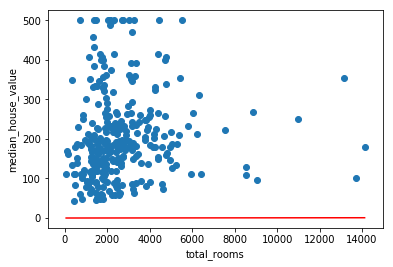

In [15]:
#Visualize the data and the learned model

sample = california_housing_dataframe.sample(n=300)

x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

y_0 = weight * x_0 + bias
y_1 = weight * x_1 + bias

plt.plot([x_0,x_1],[y_0, y_1], c='r')

plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

plt.scatter(sample["total_rooms"], sample["median_house_value"])

plt.show()


### Tweak the Model Hyperparameters

In [16]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
    periods = 10
    steps_per_period = steps/periods
    
    my_feature = input_feature
    my_feature_data = california_housing_dataframe[[my_feature]]
    my_label = "median_house_value"
    targets = california_housing_dataframe[my_label]
    
    #create feature columns
    feature_columns = [tf.feature_column.numeric_column(my_feature)]
    
    #create input functions
    training_input_fn = lambda: my_input_fn(my_feature_data, targets, batch_size=batch_size)
    prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
    
    #create linear regressor object
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns = feature_columns,
        optimizer = my_optimizer
    )
    
    #set up to plot the state of our model's line each period
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Learned Line by Period")
    plt.ylabel(my_label)
    plt.xlabel(my_feature)
    sample = california_housing_dataframe.sample(n=300)
    plt.scatter(sample[my_feature], sample[my_label])
    colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]
    
    #Train model inside loop to periodically assess loss metrics
    print("Training model ...")
    print("RMSE (on training data)")
    root_mean_squared_errors = []
    
    for period in range (0, periods):
        #train the model, beginning from prior state
        linear_regressor.train(
            input_fn = training_input_fn,
            steps = steps_per_period
        )
        #take break to compute predictions
        predictions = linear_regressor.predict(input_fn=prediction_input_fn)
        predictions = np.array([item['predictions'][0] for item in predictions])
        
        #compute loss
        root_mean_squared_error = math.sqrt(metrics.mean_squared_error(predictions, targets))
        #print the current loss:
        print(" period %02d: %0.2f" % (period, root_mean_squared_error))
        root_mean_squared_errors.append(root_mean_squared_error)
        
        y_extents = np.array([0, sample[my_label].max()])
        weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
        bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
        
        x_extents = (y_extents - bias) / weight
        x_extents = np.maximum(np.minimum(x_extents, sample[my_feature].max()), sample[my_feature].min())
        y_extents = weight * x_extents + bias
        plt.plot(x_extents, y_extents, color=colors[period])
    print("Model training finished")
    
    #output graph of loss metrics over periods
    plt.subplot(1,2,2)
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title('Root Mean Squared Error vs Periods')
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)
    
    #output a table with calibration data
    calibration_data = pd.DataFrame()
    calibration_data['predictions'] = pd.Series(predictions)
    calibration_data['targets'] = pd.Series(targets)
    display.display(calibration_data.describe())
    
    print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
    

### Assignment: Tweak model parameters to achieve RMSE <=180.

Training model ...
RMSE (on training data)
 period 00: 236.32
 period 01: 235.11
 period 02: 233.90
 period 03: 232.70
 period 04: 231.50
 period 05: 230.31
 period 06: 229.13
 period 07: 227.96
 period 08: 226.79
 period 09: 225.63
Model training finished


,predictions,targets
count,17000.0,17000.0
mean,13.2,207.3
std,10.9,116.0
min,0.0,15.0
25%,7.3,119.4
50%,10.6,180.4
75%,15.8,265.0
max,189.7,500.0


Final RMSE (on training data): 225.63


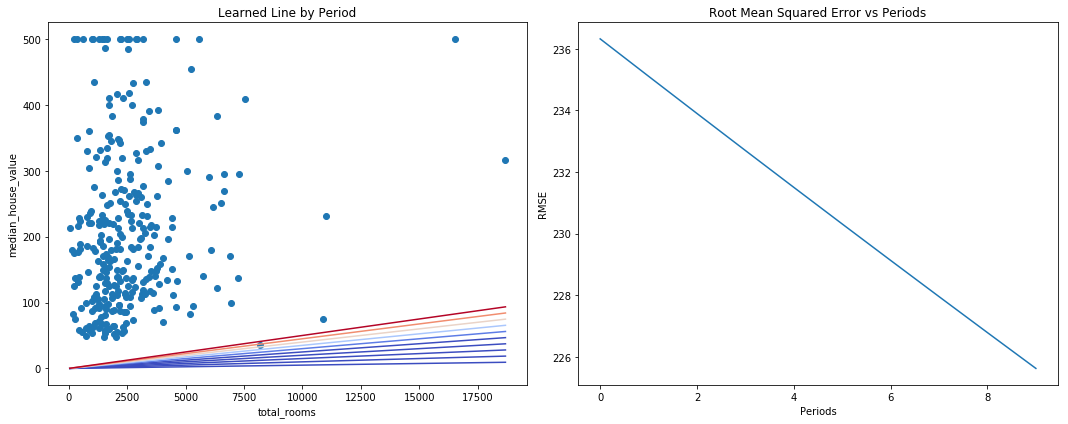

In [17]:
#train_model(learning_rate, steps, batch_size, input_feature="total_rooms")
train_model(
    learning_rate = 0.00001,
    steps = 100,
    batch_size = 1
)

Training model ...
RMSE (on training data)
 period 00: 231.50
 period 01: 225.63
 period 02: 219.93
 period 03: 214.64
 period 04: 209.74
 period 05: 204.84
 period 06: 199.96
 period 07: 195.87
 period 08: 192.00
 period 09: 188.18
Model training finished


,predictions,targets
count,17000.0,17000.0
mean,62.9,207.3
std,51.9,116.0
min,0.0,15.0
25%,34.8,119.4
50%,50.6,180.4
75%,75.0,265.0
max,902.9,500.0


Final RMSE (on training data): 188.18


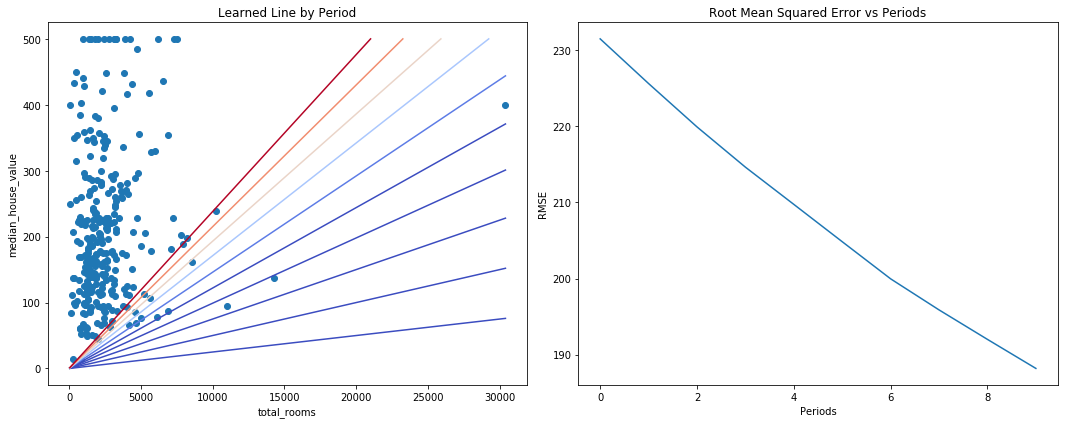

In [18]:
#train_model(learning_rate, steps, batch_size, input_feature="total_rooms")
train_model(
    learning_rate = 0.00001,
    steps = 500,
    batch_size = 1
)

Training model ...
RMSE (on training data)
 period 00: 223.32
 period 01: 210.16
 period 02: 198.64
 period 03: 189.15
 period 04: 181.34
 period 05: 174.58
 period 06: 170.92
 period 07: 168.73
 period 08: 167.23
 period 09: 166.44
Model training finished


,predictions,targets
count,17000.0,17000.0
mean,125.8,207.3
std,103.8,116.0
min,0.1,15.0
25%,69.6,119.4
50%,101.2,180.4
75%,150.0,265.0
max,1805.6,500.0


Final RMSE (on training data): 166.44


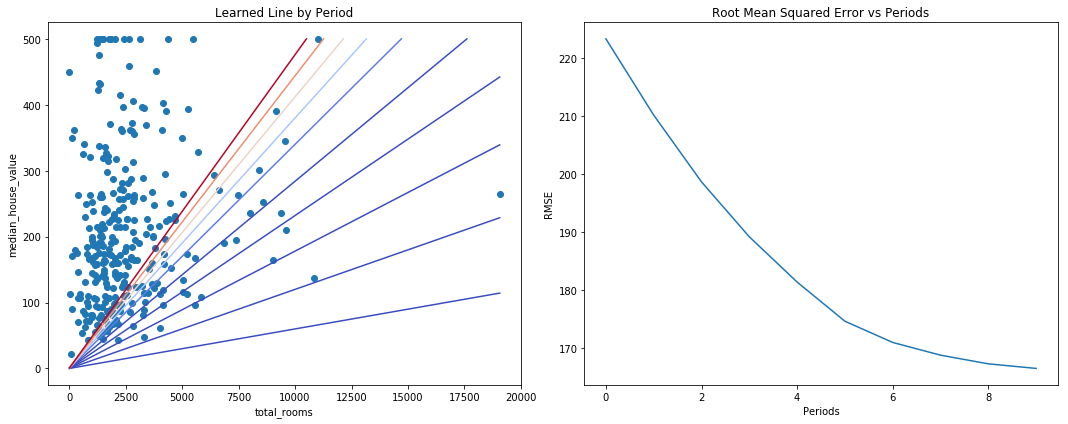

In [23]:
#train_model(learning_rate, steps, batch_size, input_feature="total_rooms")
train_model(
    learning_rate = 0.00002,
    steps = 600,
    batch_size = 5
)

### Assignment: Try model with different feature.

In [ ]:
train_model(
    learning_rate = 0.00002,
    steps = 800,
    batch_size = 5,
    input_feature="population"
)

Training model ...
RMSE (on training data)
